# Banking Customer Churn Prediction



In [1]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sb

In [10]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [22]:
# number of people from germany that exited the bank
germany = dataset[dataset['Geography'] == 'Germany']
print(germany[germany['Exited'] == 1].shape[0])
print(len(germany))
print("Percentage is: ", (germany[germany['Exited'] == 1].shape[0] / len(germany)) * 100)


# exited people from france
germany = dataset[dataset['Geography'] == 'France']
print(germany[germany['Exited'] == 1].shape[0])
print(len(germany))
print("Percentage is: ", (germany[germany['Exited'] == 1].shape[0] / len(germany)) * 100)



# number of people from germany that exited the bank
germany = dataset[dataset['Geography'] == 'Spain']
print(germany[germany['Exited'] == 1].shape[0])
print(len(germany))
print("Percentage is: ", (germany[germany['Exited'] == 1].shape[0] / len(germany)) * 100)


# exited males
germany = dataset[dataset['Gender'] == 'Male']
print(germany[germany['Exited'] == 1].shape[0])
print(len(germany))
print("Percentage is: ", (germany[germany['Exited'] == 1].shape[0] / len(germany)) * 100)

# exited males
germany = dataset[dataset['Gender'] == 'Female']
print(germany[germany['Exited'] == 1].shape[0])
print(len(germany))
print("Percentage is: ", (germany[germany['Exited'] == 1].shape[0] / len(germany)) * 100)


814
2509
Percentage is:  32.44320446392985
810
5014
Percentage is:  16.15476665337056
413
2477
Percentage is:  16.673395236172787
898
5457
Percentage is:  16.455928165658786
1139
4543
Percentage is:  25.071538630860662


KeyboardInterrupt: 

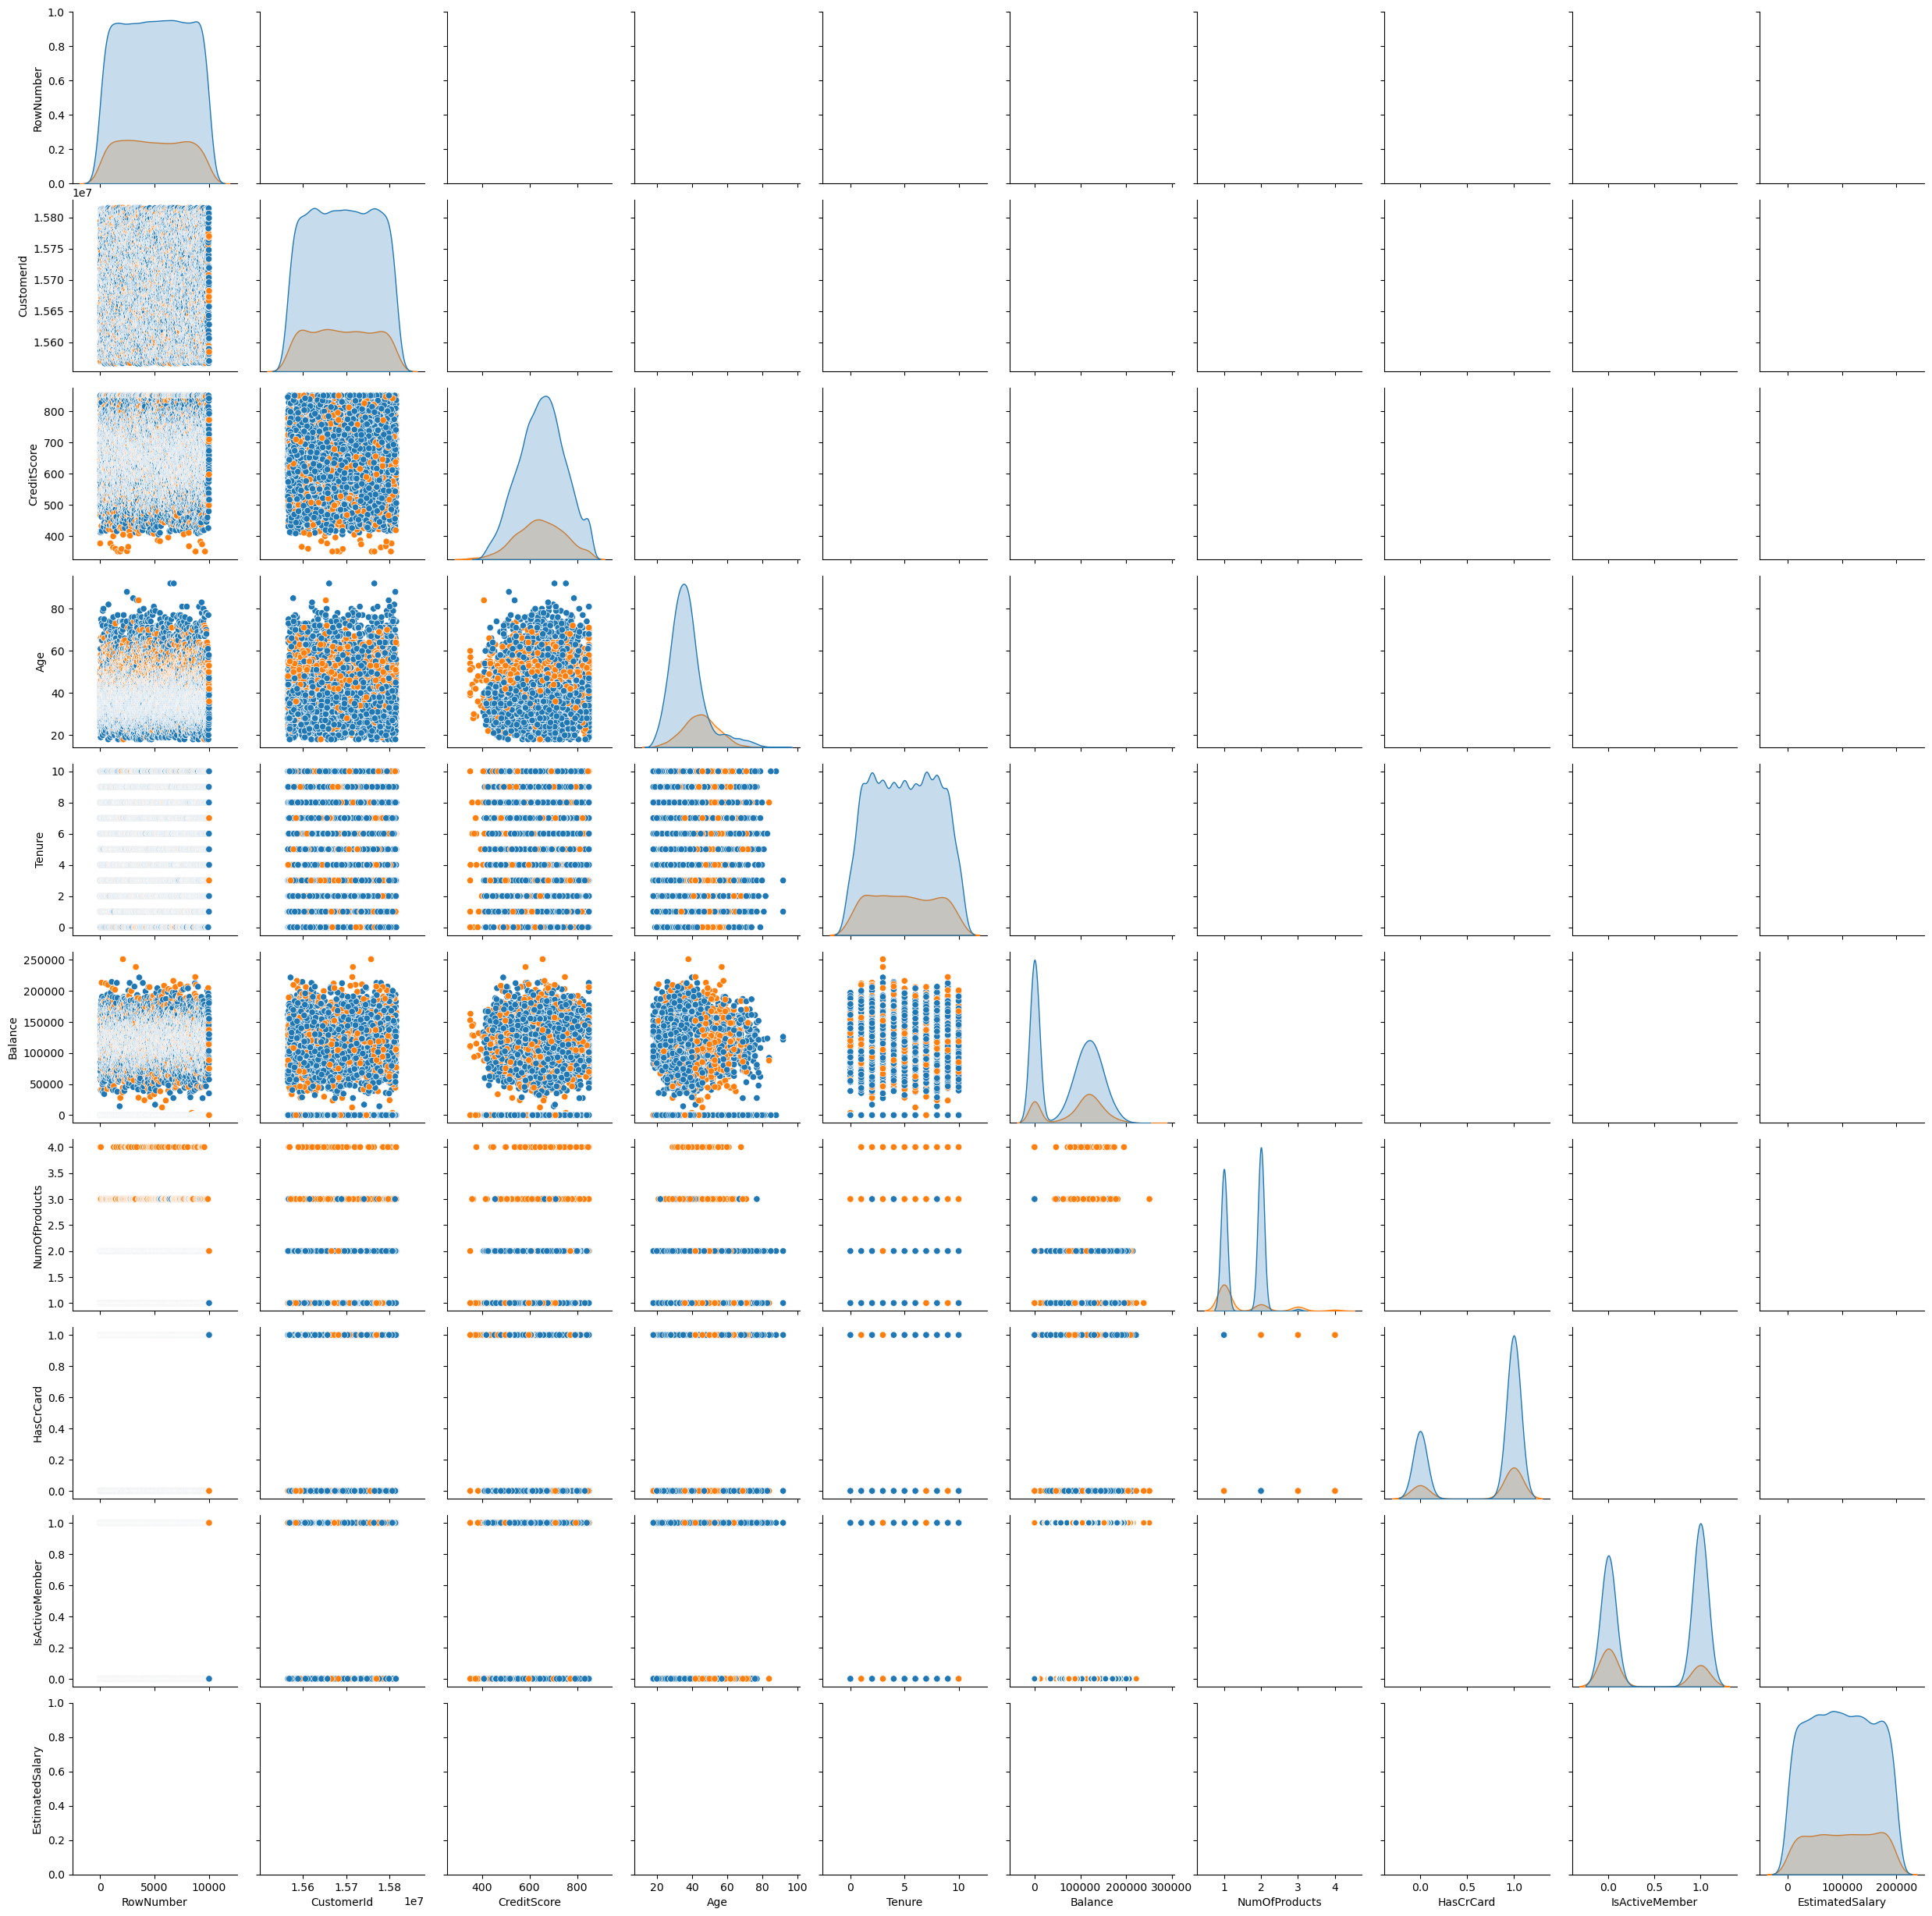

In [36]:
sb.pairplot(dataset, hue='Exited')

In [70]:
dataset['Gender'] = (dataset['Gender'] == "Male").astype(int)

In [71]:
dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [72]:
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [73]:

# Mapping the country to the minimum salary
country_salaries = {'France': 1540 * 12, 'Spain': 1050 * 12, 'Germany': 1580 * 12}

# Remove rows with 'EstimatedSalary' less than 1000
dataset = dataset[dataset['EstimatedSalary'] >= 1000]

# Multiply 'EstimatedSalary' by 12 if it's less than the corresponding country's salary
dataset.loc[dataset['EstimatedSalary'] < dataset['Geography'].map(country_salaries), 'EstimatedSalary'] *= 12



In [74]:
dataset.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000
mean,650.502766,0.545921,38.912383,5.009758,76542.359520,1.530530,0.705563,0.514536,108570.666002,0.203601
std,96.628097,0.497912,10.486845,2.891708,62382.531671,0.582092,0.455812,0.499814,53133.092269,0.402696
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12028.680000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,62811.030000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97259.250000,1.000000,1.000000,1.000000,107994.990000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127678.800000,2.000000,1.000000,1.000000,153727.320000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,227066.160000,1.000000


In [60]:
# Mapping countries to integers
countries = {'France': 0, 'Spain': 1, 'Germany': 2}
dataset['Geography'] = dataset['Geography'].map(countries)

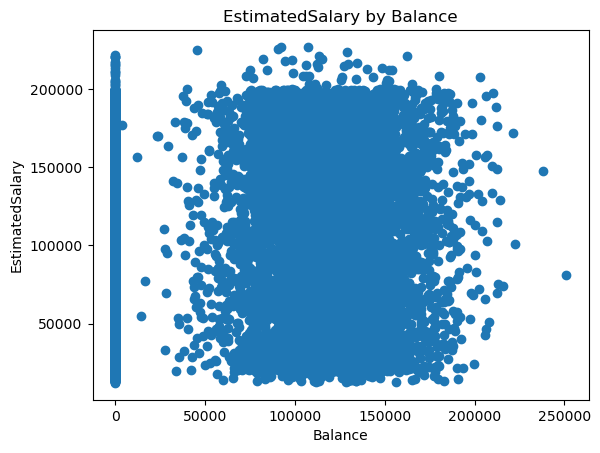

In [81]:
plt.scatter(dataset['Balance'], dataset['EstimatedSalary'])
plt.xlabel('Balance')
plt.ylabel('EstimatedSalary')
plt.title('EstimatedSalary by Balance')
plt.show()

In [82]:
newFile = open('cleaned_dataset.csv', 'w')
dataset.to_csv(newFile, index=False)

dataset = pd.read_csv('cleaned_dataset.csv')

In [83]:
dataset.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000
mean,650.502766,0.545921,38.912383,5.009758,76542.359520,1.530530,0.705563,0.514536,108570.666002,0.203601
std,96.628097,0.497912,10.486845,2.891708,62382.531671,0.582092,0.455812,0.499814,53133.092269,0.402696
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12028.680000,0.000000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,62811.030000,0.000000
50%,652.000000,1.000000,37.000000,5.000000,97259.250000,1.000000,1.000000,1.000000,107994.990000,0.000000
75%,718.000000,1.000000,44.000000,7.000000,127678.800000,2.000000,1.000000,1.000000,153727.320000,0.000000
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,227066.160000,1.000000


In [84]:
# We can extract the data in this format from pandas like this:
all_inputs = dataset[['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']].values

# Similarly, we can extract the class labels
all_labels = dataset['Exited'].values

# Make sure that you don't mix up the order of the entries
# all_inputs[5] inputs should correspond to the class in all_labels[5]

# Here's what a subset of our inputs looks like:
all_inputs[:10]

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, 2.0000000e+00,
        0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0134888e+05],
       [6.0800000e+02, 0.0000000e+00, 4.1000000e+01, 1.0000000e+00,
        8.3807860e+04, 1.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, 8.0000000e+00,
        1.5966080e+05, 3.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.1393157e+05],
       [6.9900000e+02, 0.0000000e+00, 3.9000000e+01, 1.0000000e+00,
        0.0000000e+00, 2.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        9.3826630e+04],
       [8.5000000e+02, 0.0000000e+00, 4.3000000e+01, 2.0000000e+00,
        1.2551082e+05, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        7.9084100e+04],
       [6.4500000e+02, 1.0000000e+00, 4.4000000e+01, 8.0000000e+00,
        1.1375578e+05, 2.0000000e+00, 1.0000000e+00, 0.0000000e+00,
        1.4975671e+05],
       [8.2200000e+02, 1.0000000e+00, 5.

In [85]:
from sklearn.model_selection import train_test_split

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [86]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(testing_inputs, testing_classes)

0.7916331456154465

(array([  6.,  22.,  52., 120., 224., 276., 156., 105.,  31.,   8.]),
 array([0.75462591, 0.75973451, 0.76484312, 0.76995173, 0.77506034,
        0.78016895, 0.78527755, 0.79038616, 0.79549477, 0.80060338,
        0.80571199]),
 <BarContainer object of 10 artists>)

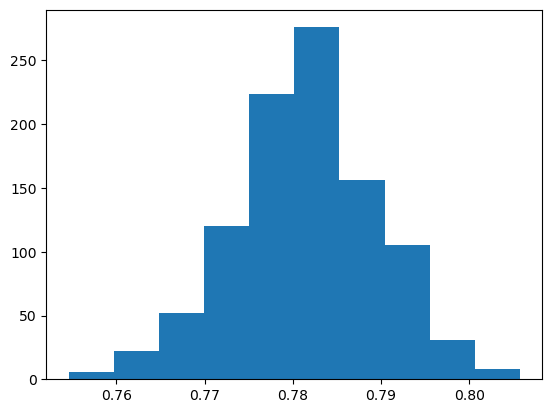

In [88]:
model_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(training_inputs, training_classes)
    classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
    model_accuracies.append(classifier_accuracy)
plt.hist(model_accuracies)

In [89]:
# Using K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()

knn_classifier.fit(training_inputs, training_classes)
knn_classifier.score(testing_inputs, testing_classes)



0.7558326629123089